
please mount google drive before you begin

# Part I: Set-up

In [1]:
cd /content/drive/MyDrive/DEX_Uniswap_Layer2/Poly

/content/drive/MyDrive/DEX_Uniswap_Layer2/Poly


In [2]:
pwd

'/content/drive/MyDrive/DEX_Uniswap_Layer2/Poly'

In [3]:
# importing pandas libraries and
# glob module
import pandas as pd

In [4]:
df_Polygon = pd.read_csv("Polygon.csv",index_col="Unnamed: 0")
df_Polygon['Timestamp']=pd.to_datetime(df_Polygon['Timestamp'])
df_Polygon.dtypes

Timestamp     datetime64[ns]
Amount_USD           float64
dtype: object

In [5]:
df_Polygon.tail()

,Timestamp,Amount_USD
22973173,2022-12-31 23:59:36,0.011947
22973174,2022-12-31 23:59:36,0.075237
22973175,2022-12-31 23:59:52,1.790000
22973177,2022-12-31 23:59:54,0.105331
22973176,2022-12-31 23:59:54,0.752557


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part II Calculating Daily Transaction Volume

In [7]:
df_Polygon['date'] =df_Polygon['Timestamp'].dt.date
df_Polygon

,Timestamp,Amount_USD,date
20432580,2021-12-20 14:27:40,0.000000,2021-12-20
20432579,2021-12-20 14:27:40,0.000000,2021-12-20
20432581,2021-12-21 08:20:43,84.811697,2021-12-21
20432582,2021-12-21 08:20:43,0.000000,2021-12-21
20432583,2021-12-21 08:20:55,10.805575,2021-12-21
...,...,...,...
22973173,2022-12-31 23:59:36,0.011947,2022-12-31
22973174,2022-12-31 23:59:36,0.075237,2022-12-31
22973175,2022-12-31 23:59:52,1.790000,2022-12-31
22973177,2022-12-31 23:59:54,0.105331,2022-12-31


In [8]:
import numpy as np
# Calculate statistics for 'Amount_USD' column and add count of observations
agg_funcs = {
    'Amount_USD': [np.min, np.max, np.sum, np.std, np.var, np.mean, np.median, lambda x: np.percentile(x, 75), lambda x: np.percentile(x, 25)]
}

# Add count of observations
agg_funcs['Amount_USD'].append(lambda x: x.count())

# Convert the 'date' column to datetime
#df_Polygon['date'] = pd.to_datetime(df_Polygon['date'])
df_Polygon_volume = df_Polygon.groupby('date').agg(agg_funcs).reset_index()

# Rename the columns for clarity
df_Polygon_volume.columns = ['date', 'min', 'max', 'sum', 'std', 'var', 'mean', 'median', 'percentile_75', 'percentile_25', 'count']

df_Polygon_volume

,date,min,max,sum,std,var,mean,median,percentile_75,percentile_25,count
0,2021-12-20,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2
1,2021-12-21,0.0,4991.537458,4.976985e+04,254.841078,6.494398e+04,48.414253,5.184673,18.946745,2.005832,1028
2,2021-12-22,0.0,75070.855375,3.147078e+06,1108.946635,1.229763e+06,275.455448,68.103127,185.173283,19.660777,11425
3,2021-12-23,0.0,49962.911639,2.462970e+07,1613.583053,2.603650e+06,547.253792,115.735044,380.901874,33.948723,45006
4,2021-12-24,0.0,103699.250625,2.932176e+07,2127.453243,4.526057e+06,661.338483,112.896571,420.093703,38.958784,44337
...,...,...,...,...,...,...,...,...,...,...,...
372,2022-12-27,0.0,285192.584744,3.428509e+07,2423.448608,5.873103e+06,571.837470,28.892993,301.247061,1.879436,59956
373,2022-12-28,0.0,80022.450391,2.953848e+07,1811.203249,3.280457e+06,537.669326,25.373004,313.938164,1.010000,54938
374,2022-12-29,0.0,85819.410959,2.986198e+07,1731.795053,2.999114e+06,487.057385,17.917506,223.529508,0.790304,61311
375,2022-12-30,0.0,247800.033354,1.793022e+07,1751.686074,3.068404e+06,376.859506,12.931272,139.894935,0.768387,47578


In [9]:
df_Polygon_volume.to_csv("Polygon_volume.csv")

In [10]:
df_Polygon_volume.dtypes

date              object
min              float64
max              float64
sum              float64
std              float64
var              float64
mean             float64
median           float64
percentile_75    float64
percentile_25    float64
count              int64
dtype: object

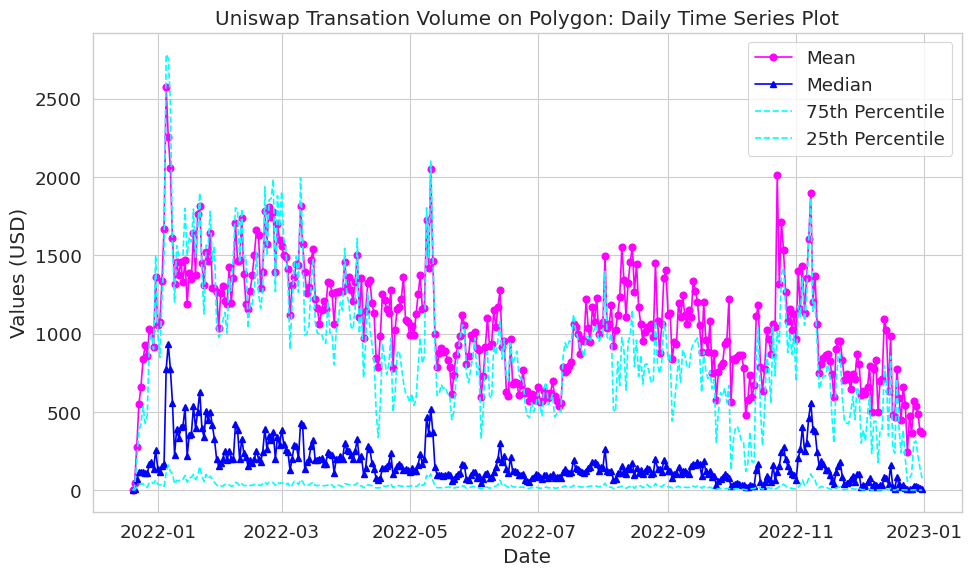

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df =df_Polygon_volume.copy()
df['date'] = pd.to_datetime(df['date'])
# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size

# Create the time series plot
plt.figure(figsize=(10, 6))

# Plot 'mean' with a warm color and solid line
plt.plot(df.index, df['mean'], label='Mean', marker='o', color='magenta', linestyle='-')

# Plot 'median', '75th Percentile', and '25th Percentile' with the same cold color and different markers
plt.plot(df.index, df['median'], label='Median', marker='^', color='blue', linestyle='-')
plt.plot(df.index, df['percentile_75'], label='75th Percentile', color='cyan', linestyle='--')
plt.plot(df.index, df['percentile_25'], label='25th Percentile',  color='cyan', linestyle='--')

# Customize the plot
plt.title('Uniswap Transation Volume on Polygon: Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Values (USD)')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_polygon_volume.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()


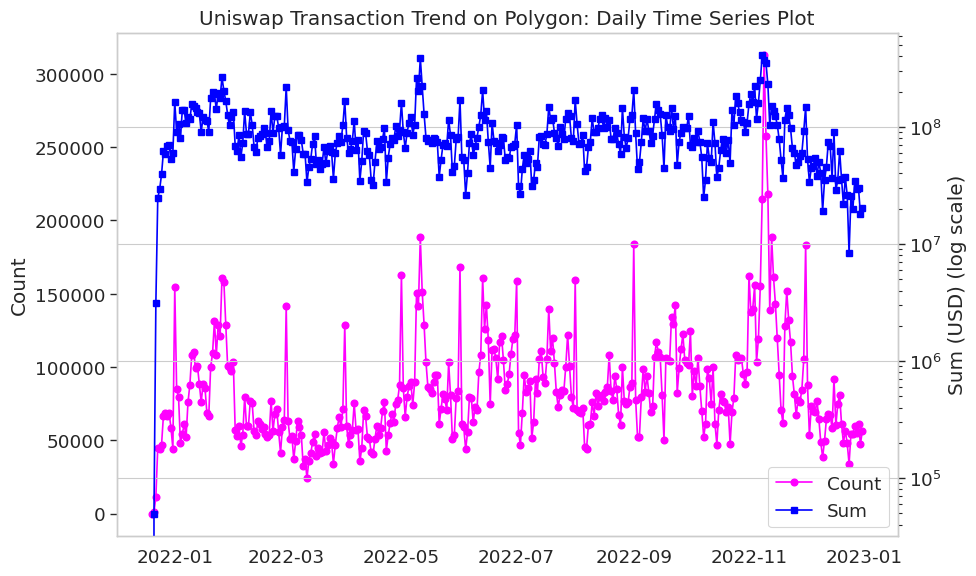

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime
df_Polygon_volume['date'] = pd.to_datetime(df_Polygon_volume['date'])

df = df_Polygon_volume.copy()
# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size

# Create the time series plot
plt.figure(figsize=(10, 6))

# Plot 'count' on the primary y-axis
count_line, = plt.plot(df.index, df['count'], label='Count', marker='o', color='magenta', linestyle='-')
plt.ylabel('Count')

# Create a secondary y-axis for 'sum' with a logarithmic scale
ax2 = plt.twinx()
ax2.set_yscale("log")  # Apply logarithmic scale to the secondary y-axis
sum_line, = ax2.plot(df.index, df['sum'], label='Sum', marker='s', color='blue', linestyle='-')
ax2.set_ylabel('Sum (USD) (log scale)')

# Combine legends from both axes
lines = [count_line, sum_line]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='lower right')

# Customize the plot
plt.title('Uniswap Transaction Trend on Polygon: Daily Time Series Plot')
plt.xlabel('Date')
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_polygon_transaction_trend.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()


# Part III Calculating Decentralized Index

In [ ]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
import pytz

In [ ]:
def index(df):
    df['Amount_USD'] = df['Amount_USD'].astype(float)
    df['prop'] = df['Amount_USD']/df['Amount_USD'].sum()
    H = -df['prop']*np.log2(df['prop'])
    E = H.sum()
    V = 2**E
    return V

def HHI(df):
    df['Amount_USD'] = df['Amount_USD'].astype(float)
    df['prop'] = (df['Amount_USD']/df['Amount_USD'].sum())*100
    SQ = df['prop']**2
    V = SQ.sum()
    return V

def gini(df):
    """
    Compute Gini coefficient of a DataFrame with a 'value' column
    """
    # Check if the DataFrame is empty or the 'value' column does not exist
    if df.empty or 'Amount_USD' not in df.columns:
        return None
    # Extract the 'value' column and convert it to a sorted list
    values = sorted(df['Amount_USD'].tolist())
    # Check if the list is empty
    if len(values) == 0:
        return None
    # Compute the cumulative sum of the values
    cum_values = [0] + list(pd.Series(values).cumsum())
    n = len(values)
    # Calculate Gini coefficient using the formula
    numer = sum([(i+1) * values[i] for i in range(n)])
    denom = n * sum(values)
    if denom == 0:
        return None  # Avoid division by zero
    gini = (2 * numer) / denom - (n + 1) / n
    return gini

def nakamoto(df):
    df.sort_values(by=['Amount_USD'],ascending=False,inplace=True)
    df.reset_index(inplace=True,drop=True)
    df.set_index(keys=df.index.values+1,inplace=True)
    df['prop'] = df['Amount_USD']/df['Amount_USD'].sum()
    df['cumprop'] = df['prop'].cumsum(axis=0)
    try:
        V = df[df['cumprop'] > 0.5].index[0]
        return V
    except:
        return 0

"""
def index_calc(data):

            :param data: dataframe containing transaction Amount_USD and timestamp of the transaction (Timestamp)
            :type data: pandas.DataFrame object
            :param start: the start date of calculation 00:00:00 UTC
            :type start: datetime.date object
            :param end: the end date of calculation 23:59:59 UTC
            :type end: datetime.date object
            :param index_type: the metrics used for measuring decentralization, default is our index
            :type index_type: index function

    returns pandas dataframe with decentralization index Amount_USD and date
"""
from tqdm import tqdm
def index_calc(data,  start, end, index_type = index):
    duration= pd.date_range(start=start, end=end)
    days = np.size(duration)
    IndexValues = pd.DataFrame(np.zeros(days), columns=['val'])
    IndexValues['date'] = duration

    for i in tqdm(range(0, days)):
        start_date = start + timedelta(days=i)
        end_date = start_date + timedelta(days=1)
        IndexValues.loc[i,'val'] = index_type(data[(data['date'] >= start_date) & (data['date'] < end_date)].copy())

    return IndexValues

In [ ]:
#input transaction data and desired date range
#returns index value 1 if specification range exceeds data
start = date(2021,12,20)
end = date(2022,12,31)
results = index_calc(df_Polygon,start,end)
results.to_csv("Polygon_Entropy.csv")
results

In [ ]:
df = pd.read_csv("Polygon_Entropy.csv", index_col="Unnamed: 0")
df.tail()

,val,date
372,10071.972867,2022-12-27
373,10006.920215,2022-12-28
374,9995.969468,2022-12-29
375,6765.091943,2022-12-30
376,5534.596049,2022-12-31


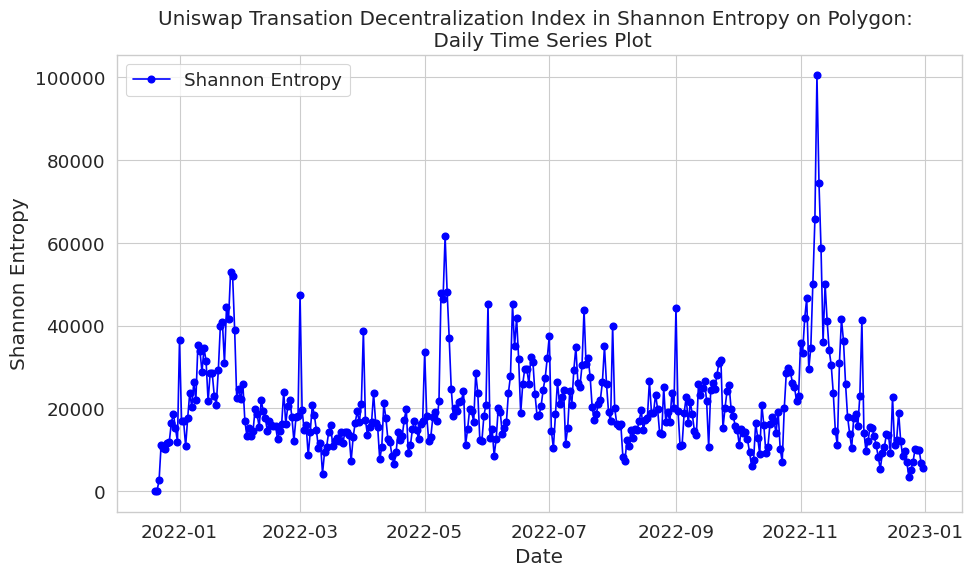

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='Shannon Entropy', marker='o',color='blue')


# Customize the plot
plt.title('Uniswap Transation Decentralization Index in Shannon Entropy on Polygon: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Shannon Entropy')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_polygon_entropy.png', dpi=500)  # Adjust dpi for higher resolution
plt.show()


In [ ]:
#specify alternate index metric: HHI
#returns index value 0 if specification range exceeds data
start = date(2021,12,20)
end = date(2022,12,31)
results_HHI = index_calc(df_Polygon,start,end,HHI)
results_HHI.to_csv("Polygon_HHI.csv")
results_HHI

100%|██████████| 377/377 [22:09<00:00,  3.53s/it]


,val,date
0,0.000000,2021-12-20
1,278.990588,2021-12-21
2,15.060110,2021-12-22
3,2.153827,2021-12-23
4,2.559521,2021-12-24
...,...,...
372,3.162380,2022-12-27
373,2.247513,2022-12-28
374,2.225096,2022-12-29
375,4.751043,2022-12-30


In [ ]:
df = pd.read_csv("Polygon_HHI.csv", index_col="Unnamed: 0")
df.tail()

,val,date
372,3.162380,2022-12-27
373,2.247513,2022-12-28
374,2.225096,2022-12-29
375,4.751043,2022-12-30
376,6.958757,2022-12-31


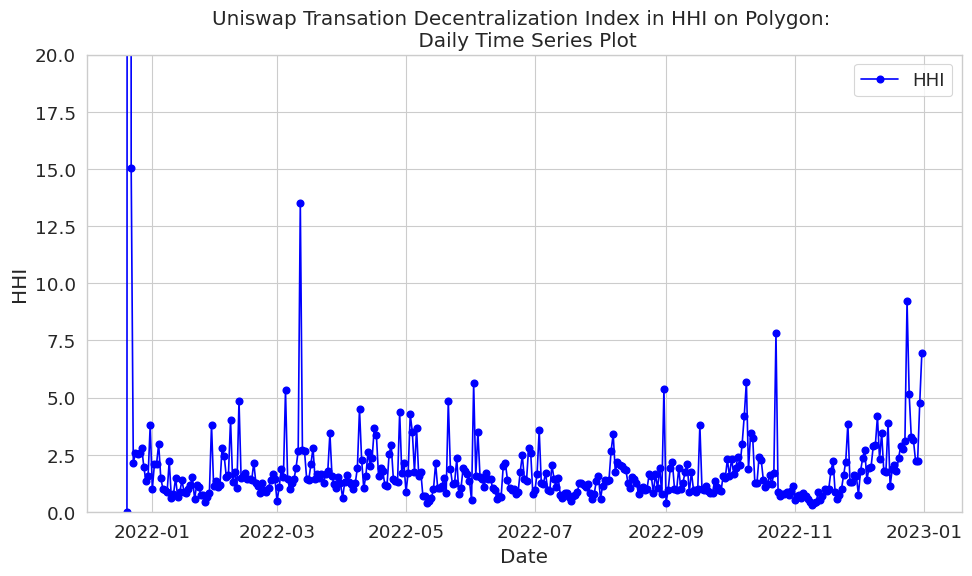

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='HHI', marker='o',color='blue')


# Customize the plot
plt.ylim(0, 20)  # Set y-axis limits
plt.title('Uniswap Transation Decentralization Index in HHI on Polygon: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('HHI')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_polygon_HHI.png', dpi=500)  # Adjust dpi for higher resolution
plt.show()


In [ ]:
#specify alternate index metric: gini
#returns index value 0 if specification range exceeds data
start = date(2021,12,20)
end = date(2022,12,31)
results_gini = index_calc(df_Polygon,start,end,gini)
results_gini.to_csv("Polygon_gini.csv")
results_gini

100%|██████████| 377/377 [22:27<00:00,  3.57s/it]


,val,date
0,NaN,2021-12-20
1,0.878194,2021-12-21
2,0.777535,2021-12-22
3,0.783307,2021-12-23
4,0.798475,2021-12-24
...,...,...
372,0.858443,2022-12-27
373,0.851723,2022-12-28
374,0.867539,2022-12-29
375,0.880150,2022-12-30


In [ ]:
df = pd.read_csv("Polygon_gini.csv", index_col="Unnamed: 0")
df.tail()

,val,date
372,0.858443,2022-12-27
373,0.851723,2022-12-28
374,0.867539,2022-12-29
375,0.880150,2022-12-30
376,0.906839,2022-12-31


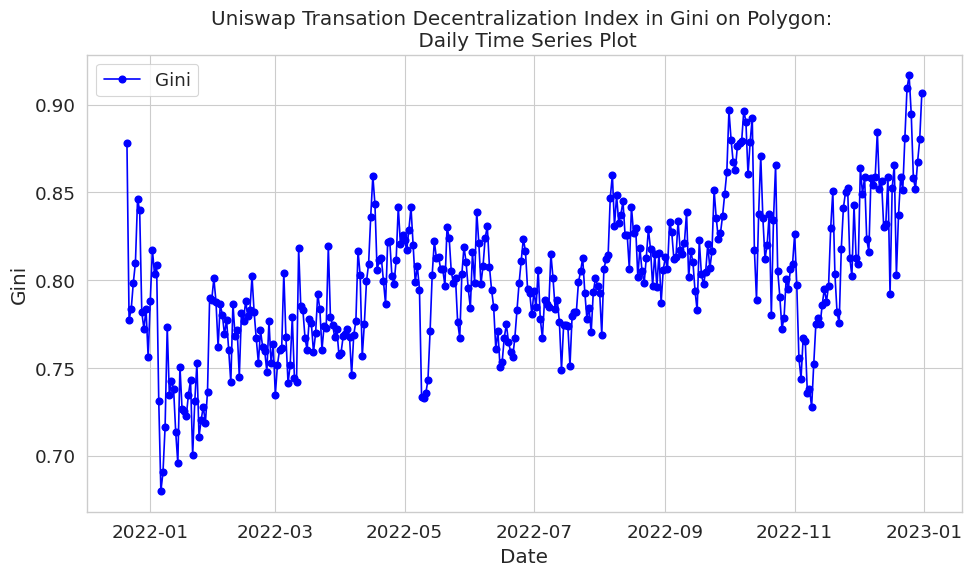

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='Gini', marker='o',color='blue')


# Customize the plot
plt.title('Uniswap Transation Decentralization Index in Gini on Polygon: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Gini')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_polygon_gini.png', dpi=500)  # Adjust dpi for higher resolution
plt.show()


In [ ]:
#specify alternate index metric: nakamoto coefficient
#returns index value 0 if specification range exceeds data
start = date(2021,12,20)
end = date(2022,12,31)
results_nakamoto = index_calc(df_Polygon,start,end,nakamoto)
results_nakamoto.to_csv("Polygon_nakamoto.csv")
results_nakamoto

100%|██████████| 377/377 [22:16<00:00,  3.55s/it]


,val,date
0,0.0,2021-12-20
1,15.0,2021-12-21
2,499.0,2021-12-22
3,2156.0,2021-12-23
4,2067.0,2021-12-24
...,...,...
372,2182.0,2022-12-27
373,2208.0,2022-12-28
374,2162.0,2022-12-29
375,1414.0,2022-12-30


In [ ]:
df = pd.read_csv("Polygon_nakamoto.csv", index_col="Unnamed: 0")
df.tail()

,val,date
372,2182.0,2022-12-27
373,2208.0,2022-12-28
374,2162.0,2022-12-29
375,1414.0,2022-12-30
376,1170.0,2022-12-31


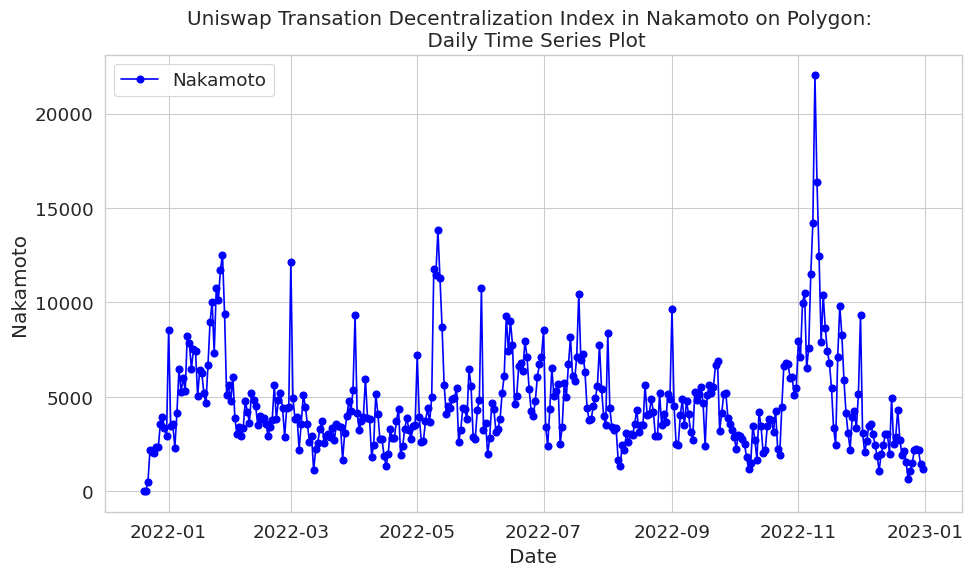

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='Nakamoto', marker='o',color='blue')


# Customize the plot
plt.title('Uniswap Transation Decentralization Index in Nakamoto on Polygon: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Nakamoto')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_polygon_nakamoto.png', dpi=500)  # Adjust dpi for higher resolution
plt.show()
